In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Add the fourier_learning_ibm package to the path
import sys, pprint

sys.path.append("/home/jovyan/fourier_learning_ibm/")
pprint.pprint(sys.path)

['/home/jovyan',
 '/opt/conda/lib/python311.zip',
 '/opt/conda/lib/python3.11',
 '/opt/conda/lib/python3.11/lib-dynload',
 '',
 '/opt/conda/lib/python3.11/site-packages',
 '/home/jovyan/fourier_learning_ibm/']


In [3]:
from pycaret.regression import RegressionExperiment, add_metric
import pickle
import json
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from pycaret.regression import RegressionExperiment

from heisenberg_graph import (
    extract_probs,
)

In [4]:
# Only for CP1
%cd fourier_learning_ibm/

/home/jovyan/fourier_learning_ibm


In [5]:
# Load parameters
# CURRENT_TIME = "2024-12-10T15:41Z"
# path = f"./data/{CURRENT_TIME}"
path = "data/2024-12-13T08:56Z"

# Load the graphs as a binary file
with open(f"{path}/params_object.pkl", "rb") as f:
    params_object = pickle.load(f)

graphs = params_object["graphs"]
all_Js = params_object["Js"]
all_expected_values = params_object["expected_values"]

for key, value in params_object.items():
    print(f"{key}: {value}")

# Load the parameters as a JSON file
with open(f"{path}/params_text.json", "r") as f:
    params = json.load(f)

n_samples = params["n_samples"]
n_qubits = params["n_qubits"]
graph_type = params["graph_type"]
backend_qpu_name = params["backend_qpu_name"]
beta = params["beta"]
C = params["C"]
n_features = params["n_features"]
times = params["times"]

for key, value in params.items():
    print(f"{key}: {value}")

graphs: [<networkx.classes.graph.Graph object at 0x7fc8d1e7ddd0>, <networkx.classes.graph.Graph object at 0x7fc8d1e7ee10>, <networkx.classes.graph.Graph object at 0x7fc8d1e7fbd0>, <networkx.classes.graph.Graph object at 0x7fc8d1e889d0>, <networkx.classes.graph.Graph object at 0x7fc8d1e89790>, <networkx.classes.graph.Graph object at 0x7fc8d1e8a550>, <networkx.classes.graph.Graph object at 0x7fc8d1e8b310>, <networkx.classes.graph.Graph object at 0x7fc8d1e98110>, <networkx.classes.graph.Graph object at 0x7fc8d1e98ed0>, <networkx.classes.graph.Graph object at 0x7fc8d1e99c90>, <networkx.classes.graph.Graph object at 0x7fc8d1e9aa50>, <networkx.classes.graph.Graph object at 0x7fc8d1e9b810>, <networkx.classes.graph.Graph object at 0x7fc8d1ea0610>, <networkx.classes.graph.Graph object at 0x7fc8d1ea13d0>, <networkx.classes.graph.Graph object at 0x7fc8d1ea2190>, <networkx.classes.graph.Graph object at 0x7fc8d1ea2f50>, <networkx.classes.graph.Graph object at 0x7fc8d1ea3d10>, <networkx.classes.grap

## Plot probability

In [6]:
# Load the data as a json file
with open(f"{path}/probs_phase0_exact.json", "r") as f:
    probs_phase0_exact = json.load(f)
with open(f"{path}/probs_phase1_exact.json", "r") as f:
    probs_phase1_exact = json.load(f)
with open(f"{path}/probs_phase2_exact.json", "r") as f:
    probs_phase2_exact = json.load(f)
with open(f"{path}/probs_phase3_exact.json", "r") as f:
    probs_phase3_exact = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/2024-12-13T08:56Z/probs_phase0_exact.json'

In [7]:
with open(f"{path}/probs_phase0_sim.json", "r") as f:
    probs_phase0_sim = json.load(f)
with open(f"{path}/probs_phase1_sim.json", "r") as f:
    probs_phase1_sim = json.load(f)
with open(f"{path}/probs_phase2_sim.json", "r") as f:
    probs_phase2_sim = json.load(f)
with open(f"{path}/probs_phase3_sim.json", "r") as f:
    probs_phase3_sim = json.load(f)

In [8]:
with open(f"{path}/probs_phase0_sim_noisy.json", "r") as f:
    probs_phase0_sim_noisy = json.load(f)
with open(f"{path}/probs_phase1_sim_noisy.json", "r") as f:
    probs_phase1_sim_noisy = json.load(f)
with open(f"{path}/probs_phase2_sim_noisy.json", "r") as f:
    probs_phase2_sim_noisy = json.load(f)
with open(f"{path}/probs_phase3_sim_noisy.json", "r") as f:
    probs_phase3_sim_noisy = json.load(f)

In [7]:
with open(f"{path}/probs_phase0_nmit.json", "r") as f:
    probs_phase0_nmit = json.load(f)
with open(f"{path}/probs_phase1_nmit.json", "r") as f:
    probs_phase1_nmit = json.load(f)
with open(f"{path}/probs_phase2_nmit.json", "r") as f:
    probs_phase2_nmit = json.load(f)
with open(f"{path}/probs_phase3_nmit.json", "r") as f:
    probs_phase3_nmit = json.load(f)

with open(f"{path}/probs_phase0_mit.json", "r") as f:
    probs_phase0_mit = json.load(f)
with open(f"{path}/probs_phase1_mit.json", "r") as f:
    probs_phase1_mit = json.load(f)
with open(f"{path}/probs_phase2_mit.json", "r") as f:
    probs_phase2_mit = json.load(f)
with open(f"{path}/probs_phase3_mit.json", "r") as f:
    probs_phase3_mit = json.load(f)

In [8]:
with open(f"{path}/successful_job_ids_and_samples.json", "r") as f:
    successful_job_ids_and_samples = json.load(f)

In [11]:
# For debugging
# dummy_successful_job_ids_and_samples = {}
# for i in range(n_samples):
#     dummy_successful_job_ids_and_samples[f"sample{i}"] = None

# successful_job_ids_and_samples = dummy_successful_job_ids_and_samples

In [12]:
probs_phase0_exact_extracted = extract_probs(
    probs_phase0_exact, successful_job_ids_and_samples.keys()
)
probs_phase1_exact_extracted = extract_probs(
    probs_phase1_exact, successful_job_ids_and_samples.keys()
)
probs_phase2_exact_extracted = extract_probs(
    probs_phase2_exact, successful_job_ids_and_samples.keys()
)
probs_phase3_exact_extracted = extract_probs(
    probs_phase3_exact, successful_job_ids_and_samples.keys()
)

In [13]:
probs_phase0_sim_extracted = extract_probs(
    probs_phase0_sim, successful_job_ids_and_samples.keys()
)
probs_phase1_sim_extracted = extract_probs(
    probs_phase1_sim, successful_job_ids_and_samples.keys()
)
probs_phase2_sim_extracted = extract_probs(
    probs_phase2_sim, successful_job_ids_and_samples.keys()
)
probs_phase3_sim_extracted = extract_probs(
    probs_phase3_sim, successful_job_ids_and_samples.keys()
)

In [14]:
probs_phase0_sim_noisy_extracted = extract_probs(
    probs_phase0_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase1_sim_noisy_extracted = extract_probs(
    probs_phase1_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase2_sim_noisy_extracted = extract_probs(
    probs_phase2_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase3_sim_noisy_extracted = extract_probs(
    probs_phase3_sim_noisy, successful_job_ids_and_samples.keys()
)

In [9]:
probs_phase0_nmit_extracted = extract_probs(
    probs_phase0_nmit, successful_job_ids_and_samples.keys()
)
probs_phase1_nmit_extracted = extract_probs(
    probs_phase1_nmit, successful_job_ids_and_samples.keys()
)
probs_phase2_nmit_extracted = extract_probs(
    probs_phase2_nmit, successful_job_ids_and_samples.keys()
)
probs_phase3_nmit_extracted = extract_probs(
    probs_phase3_nmit, successful_job_ids_and_samples.keys()
)

probs_phase0_mit_extracted = extract_probs(
    probs_phase0_mit, successful_job_ids_and_samples.keys()
)
probs_phase1_mit_extracted = extract_probs(
    probs_phase1_mit, successful_job_ids_and_samples.keys()
)
probs_phase2_mit_extracted = extract_probs(
    probs_phase2_mit, successful_job_ids_and_samples.keys()
)
probs_phase3_mit_extracted = extract_probs(
    probs_phase3_mit, successful_job_ids_and_samples.keys()
)

In [10]:
# Plot exact vs. Trotterized results
plt.figure(figsize=(8, 6))
# plt.scatter(
#     probs_phase0_exact_extracted,
#     probs_phase0_sim_extracted,
#     label=f"Phase 0 (Simulator, noise free)",
#     alpha=0.5,
# )
# plt.scatter(
#     probs_phase0_exact_extracted,
#     probs_phase0_sim_noisy_extracted,
#     label=f"Phase 0 (Simulator: noise_model:{backend_qpu_name})",
#     alpha=0.5,
# )
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_nmit_extracted,
    label=f"Phase 0 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_mit_extracted,
    label=f"Phase 0 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

NameError: name 'probs_phase0_exact_extracted' is not defined

<Figure size 800x600 with 0 Axes>

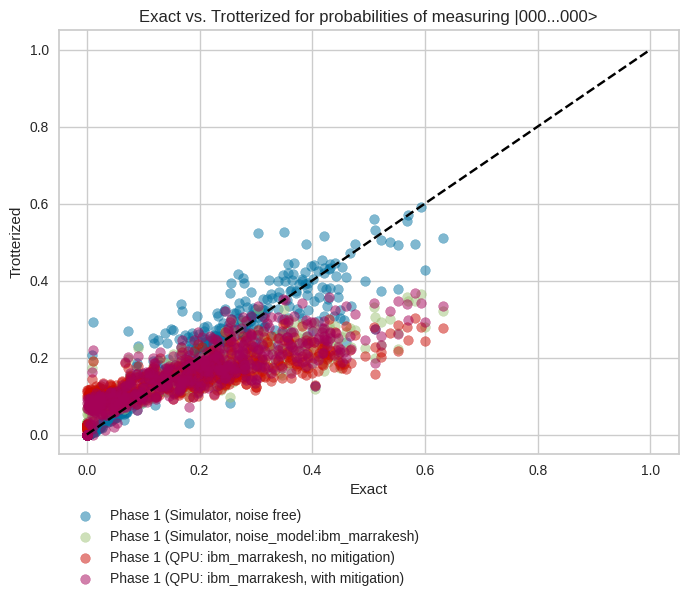

In [17]:
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_sim_extracted,
    label=f"Phase 1 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_sim_noisy_extracted,
    label=f"Phase 1 (Simulator, noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_nmit_extracted,
    label=f"Phase 1 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_mit_extracted,
    label=f"Phase 1 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

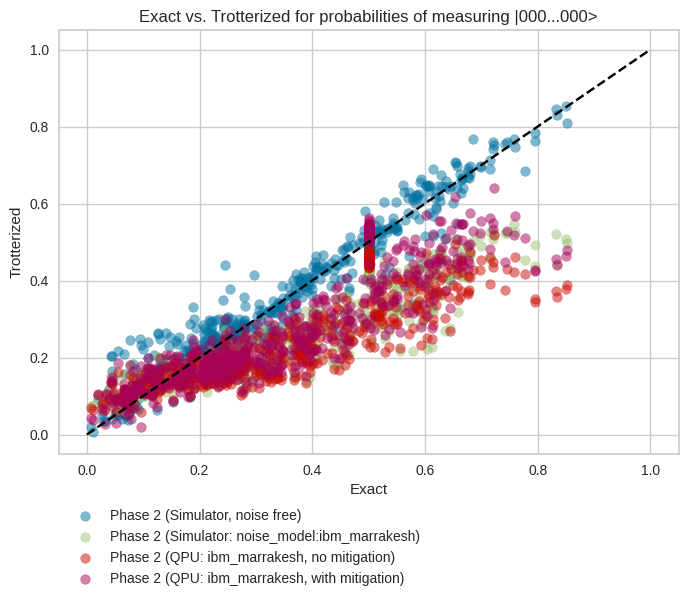

In [18]:
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_sim_extracted,
    label=f"Phase 2 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_sim_noisy_extracted,
    label=f"Phase 2 (Simulator: noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_nmit_extracted,
    label=f"Phase 2 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_mit_extracted,
    label=f"Phase 2 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")

plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

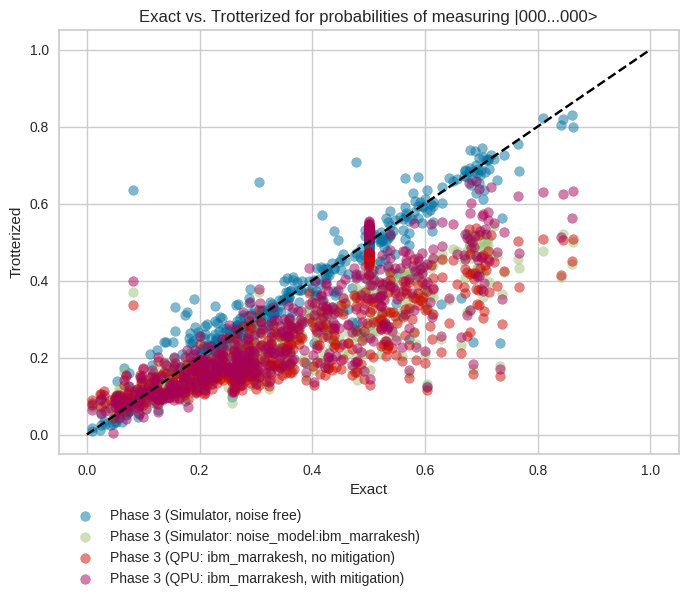

In [19]:
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_sim_extracted,
    label=f"Phase 3 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_sim_noisy_extracted,
    label=f"Phase 3 (Simulator: noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_nmit_extracted,
    label=f"Phase 3 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_mit_extracted,
    label=f"Phase 3 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

## Regression

In [20]:
data_exact_df = pd.read_json(f"{path}/data_exact_df.json")

In [21]:
data_sim_df = pd.read_json(f"{path}/data_sim_df.json")

In [22]:
data_sim_noisy_df = pd.read_json(f"{path}/data_sim_noisy_df.json")

In [11]:
data_nmit_df = pd.read_json(f"{path}/data_qpu_nmit_df.json")
data_mit_df = pd.read_json(f"{path}/data_qpu_mit_df.json")

In [24]:
# For debugging
# data_mit_df = data_exact_df

In [25]:
# Extract features which have overlap with data_mit_df (i.e. successful samples)
data_exact_df = data_exact_df[data_exact_df.index.isin(data_mit_df.sample_id)]

In [26]:
data_sim_df = data_sim_df[data_sim_df.index.isin(data_mit_df.sample_id)]

In [27]:
data_sim_noisy_df = data_sim_noisy_df[
    data_sim_noisy_df.index.isin(data_mit_df.sample_id)
]

In [12]:
data_nmit_df = data_nmit_df[data_nmit_df.index.isin(data_mit_df.sample_id)]

In [29]:
print("Exact")
display(data_exact_df)

Exact


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,1,0.900047,-0.332700,0.635283,-0.609494,0.287738,-0.779225,-0.058833,-0.806006,...,-0.683787,-0.546998,-0.445753,-0.638873,-0.156718,-0.610967,0.111648,-0.469065,0.308467,1.582990
1,1,1,0.850001,-0.412066,0.486014,-0.624517,0.111061,-0.559195,-0.082970,-0.302143,...,-0.041813,0.171595,0.054095,0.347926,-0.058373,0.353618,-0.281554,0.170391,-0.450303,0.453302
2,2,1,0.897816,-0.290876,0.640270,-0.483702,0.335499,-0.535950,0.076776,-0.469539,...,-0.336297,-0.184153,-0.182929,-0.204061,-0.041636,-0.176450,0.066488,-0.123502,0.132407,1.100555
3,3,1,0.898511,-0.195204,0.674128,-0.262616,0.479211,-0.205658,0.386657,-0.134370,...,-0.135303,0.303237,-0.201439,0.216790,-0.275604,0.119879,-0.319299,0.047756,-0.333527,1.057326
4,4,1,0.967097,0.126070,0.878896,0.225838,0.761707,0.284416,0.645852,0.303312,...,0.297480,0.498253,0.287541,0.473686,0.291132,0.468802,0.316601,0.469811,0.361831,2.430337
5,5,1,0.790331,-0.310000,0.355392,-0.317697,0.066869,-0.038508,0.094203,0.238947,...,0.276044,0.366651,0.104858,0.252579,-0.056992,0.060816,-0.048947,-0.032092,0.095503,1.390452
6,6,1,0.905174,0.392721,0.653416,0.691569,0.321942,0.844675,-0.011694,0.853602,...,0.750433,-0.522324,0.566294,-0.663532,0.321318,-0.700998,0.040540,-0.617745,-0.228622,5.624548
7,7,1,0.942251,-0.161082,0.798125,-0.274746,0.630302,-0.326757,0.488604,-0.334308,...,-0.318443,0.326877,-0.288385,0.293764,-0.252019,0.274444,-0.227292,0.240054,-0.229836,1.090109
8,8,1,0.865242,-0.157150,0.556035,-0.321777,0.248575,-0.423261,0.040529,-0.388326,...,-0.239837,-0.082493,-0.073372,-0.037057,0.030573,0.036677,0.045328,0.094292,-0.023382,8.392081
9,9,1,0.989869,0.082264,0.964050,0.164233,0.929583,0.241075,0.889556,0.309520,...,0.370312,0.803684,0.422234,0.757579,0.463264,0.705039,0.496501,0.648946,0.525904,1.481529


In [30]:
print("Simulator (noise free)")
display(data_sim_df)

Simulator (noise free)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,1,0.907000,-0.340316,0.663342,-0.618949,0.446963,-0.699511,0.032400,-0.775937,...,-0.656630,-0.222789,-0.421005,-0.171256,-0.216893,-0.411409,-0.109818,-0.275079,-0.003500,1.582990
1,1,1,0.863436,-0.407021,0.483886,-0.604502,0.140250,-0.544807,-0.132226,-0.288978,...,-0.008975,0.175444,0.051585,0.386597,-0.011336,0.369173,-0.242335,0.238245,-0.486841,0.453302
2,2,1,0.885704,-0.307905,0.673642,-0.500346,0.400432,-0.573517,0.113543,-0.504597,...,-0.418052,-0.129429,-0.296784,-0.126965,-0.197972,-0.197342,-0.079388,-0.101221,-0.083903,1.100555
3,3,1,0.903360,-0.192876,0.596377,-0.287957,0.328775,-0.232324,0.245246,-0.138072,...,-0.124353,0.070187,-0.087866,-0.059599,-0.099726,-0.031492,-0.276690,-0.165171,-0.287532,1.057326
4,4,1,0.966226,0.139450,0.900065,0.208881,0.814398,0.311428,0.651830,0.336368,...,0.364624,0.511169,0.391204,0.410991,0.437850,0.422894,0.402294,0.373674,0.453978,2.430337
5,5,1,0.806774,-0.341349,0.417403,-0.343955,0.128377,-0.240353,0.102186,0.146757,...,0.186886,0.242602,0.146683,0.207747,0.103210,0.059578,-0.115627,-0.051054,-0.043889,1.390452
6,6,1,0.912064,0.380969,0.657936,0.685921,0.334084,0.818926,-0.021773,0.861052,...,0.730618,-0.484214,0.528091,-0.610567,0.281482,-0.687139,0.032526,-0.552684,-0.210438,5.624548
7,7,1,0.921865,-0.158517,0.776621,-0.266527,0.536162,-0.305754,0.462032,-0.352655,...,-0.321258,0.157009,-0.316008,0.086312,-0.260430,0.206400,-0.265572,0.211701,-0.222077,1.090109
8,8,1,0.826762,-0.143543,0.518019,-0.161174,0.125945,-0.098644,0.007070,-0.297308,...,-0.159986,-0.018882,0.010660,0.074032,0.074232,0.183897,0.082518,0.229261,0.170759,8.392081
9,9,1,0.998312,0.078066,0.988321,0.152601,0.904217,0.220141,0.877418,0.306549,...,0.333939,0.786238,0.405458,0.697637,0.421475,0.698444,0.448824,0.637640,0.459606,1.481529


In [31]:
print("Simulator (noisy)")
display(data_sim_noisy_df)

Simulator (noisy)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,0.821289,0.577366,-0.249268,0.430732,-0.361549,0.252310,-0.422250,0.044050,-0.428645,...,-0.364334,-0.135065,-0.206506,-0.122958,-0.121550,-0.183231,-0.060489,-0.119766,0.010170,1.582990
1,1,0.805664,0.534604,-0.273543,0.305243,-0.345965,0.101332,-0.359997,-0.035514,-0.164757,...,-0.043419,0.072711,0.036229,0.235300,-0.005286,0.158602,-0.097306,0.120393,-0.200468,0.453302
2,2,0.793945,0.552327,-0.172607,0.413288,-0.282469,0.280257,-0.344473,0.026981,-0.266302,...,-0.219348,-0.081111,-0.168438,-0.099271,-0.123242,-0.088406,-0.029243,-0.064367,-0.025042,1.100555
3,3,0.797852,0.535149,-0.133477,0.373104,-0.184942,0.190059,-0.135643,0.158089,-0.033458,...,-0.062007,0.024704,-0.019459,-0.012545,-0.043234,-0.011344,-0.140673,-0.073958,-0.147178,1.057326
4,4,0.835938,0.592586,0.082635,0.559802,0.167845,0.500699,0.190439,0.327542,0.143996,...,0.213907,0.261855,0.229990,0.224120,0.241328,0.199729,0.169020,0.186438,0.218457,2.430337
5,5,0.817383,0.486477,-0.184846,0.230277,-0.232939,0.084155,-0.200250,0.029041,0.055764,...,0.109446,0.134839,0.075489,0.106554,0.030553,0.033872,-0.048307,-0.033538,-0.004641,1.390452
6,6,0.813477,0.549566,0.230825,0.421397,0.403068,0.180833,0.556250,-0.004838,0.432514,...,0.386452,-0.260096,0.288159,-0.342569,0.149613,-0.281550,0.034218,-0.279738,-0.084339,5.624548
7,7,0.793945,0.582436,-0.128891,0.461870,-0.182086,0.314916,-0.171818,0.243385,-0.163592,...,-0.171542,0.118001,-0.147694,0.041566,-0.132577,0.120823,-0.100893,0.106825,-0.072319,1.090109
8,8,0.823242,0.556378,-0.086337,0.332174,-0.112998,0.087821,-0.007677,0.013498,-0.162820,...,-0.068274,-0.023178,-0.016007,0.016536,0.020445,0.059267,0.006317,0.118710,0.087283,8.392081
9,9,0.825195,0.594675,0.083240,0.627709,0.086810,0.571776,0.126070,0.448555,0.155130,...,0.214706,0.441325,0.175293,0.387863,0.232661,0.302324,0.217374,0.285783,0.180161,1.481529


In [13]:
print("no mitigation")
display(data_nmit_df)

print("mitigation")
display(data_mit_df)

no mitigation


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,0.986919,0.774722,-0.483783,0.288229,-0.478849,0.084149,-0.235900,-0.003499,-0.014472,...,0.009952,0.026269,-0.122737,-0.023628,-0.218521,-0.187327,-0.125469,-0.432232,-0.098285,1.557428
1,1,0.984157,0.947124,0.093948,0.767345,0.193761,0.519169,0.178918,0.236421,0.039292,...,-0.015728,-0.127702,-0.152225,-0.234485,-0.309078,-0.381077,-0.255850,-0.232752,-0.398227,4.323829
2,2,0.987915,0.937529,0.114684,0.772754,0.115325,0.486199,0.239759,0.196425,0.178823,...,0.121484,0.138859,0.108520,0.042111,0.089588,-0.004768,0.016652,0.018768,0.043411,13.987062
3,3,0.977034,0.937407,0.224568,0.753852,0.428348,0.584698,0.268859,0.292510,0.262346,...,0.312729,0.136335,0.301811,0.180864,0.198975,0.210961,0.136460,-0.092019,0.000543,3.728221
4,4,0.981243,0.940415,0.315740,0.822623,0.508497,0.567369,0.489393,0.347922,0.444319,...,0.256395,0.240125,0.116866,0.330636,0.057896,0.448353,0.005402,0.414915,0.199647,4.634752
5,5,0.972898,0.854283,-0.160627,0.379312,-0.006122,0.048799,0.001415,0.057219,-0.027864,...,-0.188072,-0.223761,-0.273133,-0.266214,-0.148733,-0.167387,0.020474,-0.023073,0.032157,6.514767
6,6,0.943057,0.837942,-0.001513,0.563420,0.011039,0.226213,0.007248,-0.042769,-0.006780,...,0.028016,0.022251,-0.039310,-0.005212,0.004557,-0.059711,0.047670,-0.118450,-0.010860,4.442313
7,7,0.951148,0.821482,0.454006,0.428429,0.602067,0.183841,0.461776,0.039620,0.178955,...,0.120915,0.348136,0.100446,0.352577,0.242957,0.329013,0.298872,0.165040,0.328728,11.866389
8,8,0.959280,0.547475,-0.721946,-0.167272,-0.813880,-0.561743,-0.362503,-0.436865,-0.048963,...,0.287078,0.003139,0.297886,0.154512,0.215912,0.177214,0.000220,0.130912,-0.135050,0.101123
9,9,0.955127,0.875106,-0.381576,0.616103,-0.688649,0.399224,-0.774771,0.100062,-0.715380,...,-0.474754,-0.250758,-0.387093,-0.310899,-0.249576,-0.311176,-0.084125,-0.293501,0.113711,0.321470


mitigation


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,0.776367,0.440887,-0.273049,0.169353,-0.280482,0.042604,-0.132249,-0.002912,-0.008579,...,0.011348,0.020900,-0.071306,-0.012484,-0.130375,-0.103709,-0.077562,-0.241043,-0.055874,1.557428
1,1,0.775146,0.547048,0.042426,0.444254,0.104825,0.295232,0.100611,0.139429,0.017690,...,-0.008603,-0.075938,-0.083437,-0.132957,-0.175147,-0.224263,-0.144531,-0.132038,-0.225543,4.323829
2,2,0.773193,0.550297,0.071370,0.446234,0.077668,0.275537,0.134147,0.116126,0.097975,...,0.067890,0.077981,0.061456,0.024318,0.050837,-0.002532,0.009687,0.009835,0.025681,13.987062
3,3,0.779541,0.569288,0.135698,0.442459,0.239081,0.342121,0.156123,0.165313,0.152576,...,0.185263,0.076306,0.168130,0.101532,0.111822,0.116241,0.076255,-0.052003,0.000324,3.728221
4,4,0.781250,0.548148,0.185485,0.462618,0.288170,0.331070,0.286616,0.193372,0.251893,...,0.144133,0.139269,0.061378,0.183190,0.034011,0.253600,0.002446,0.235073,0.113465,4.634752
5,5,0.777100,0.489794,-0.085686,0.223055,-0.007613,0.029770,0.001619,0.038111,-0.013434,...,-0.105575,-0.122143,-0.157641,-0.149993,-0.084563,-0.094924,0.010842,-0.014691,0.022221,6.514767
6,6,0.767822,0.491969,-0.002223,0.330388,0.000527,0.132793,0.004733,-0.025504,-0.003382,...,0.018670,0.011559,-0.019922,-0.004224,-0.002947,-0.036287,0.030682,-0.069332,-0.011876,4.442313
7,7,0.768799,0.489488,0.265866,0.249409,0.353850,0.108335,0.270532,0.022988,0.104691,...,0.069275,0.199187,0.052209,0.196919,0.138890,0.186738,0.164118,0.092747,0.182412,11.866389
8,8,0.758057,0.323037,-0.426849,-0.097934,-0.476840,-0.319556,-0.201896,-0.247297,-0.019979,...,0.163458,0.002309,0.167431,0.084468,0.125134,0.099202,-0.000674,0.074064,-0.077236,0.101123
9,9,0.759766,0.542250,-0.233418,0.366545,-0.405136,0.237700,-0.439634,0.051432,-0.405710,...,-0.269240,-0.145885,-0.217290,-0.174863,-0.141729,-0.174666,-0.049510,-0.161711,0.065218,0.321470


## Exact

In [14]:
train_size = 0.8
session_id = 42

In [34]:
def create_model_and_plot(experiment: RegressionExperiment) -> None:
    # 実際の値 (expected_value) と予測値 (prediction_label)
    model = experiment.compare_models(turbo=True, sort="R2")
    experiment.tune_model(model, optimize="MSE", choose_better=True)

    # モデルの名前を取得
    model_name = model.__class__.__name__

    pred = experiment.predict_model(model)
    x = pred["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
    y = pred["prediction_label"].values

    # 回帰直線を計算
    linear_model = LinearRegression()
    linear_model.fit(x, y)
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_

    # プロット
    results = experiment.pull()
    r2 = results["R2"].values[0]
    mse = results["MSE"].values[0]
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5, label=f"R2 = {r2:.2f}, MSE = {mse:.2f}")

    # 回帰直線を追加
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    plt.plot(
        x_range,
        linear_model.predict(x_range),
        color="red",
        label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
    )

    # Identity line
    plt.plot(
        [x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity"
    )

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.title(f"Predicted vs Actual for {model_name}")
    plt.show()

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0266,0.0030,0.0437,0.9991,0.0153,0.0328,0.2940
br,Bayesian Ridge,0.1645,0.1646,0.2638,0.9838,0.0603,0.1420,0.1640
huber,Huber Regressor,0.3217,0.3193,0.4504,0.9483,0.0838,0.1996,0.1510
et,Extra Trees Regressor,1.3060,3.3557,1.7050,0.6168,0.3547,0.7525,0.0190
ridge,Ridge Regression,1.2931,3.4849,1.6762,0.5950,0.3624,1.2016,0.1630
rf,Random Forest Regressor,1.5184,3.9125,1.8425,0.4817,0.4238,1.0911,0.0230
knn,K Neighbors Regressor,1.5508,4.4263,1.9425,0.4780,0.4374,1.2223,0.0130
ada,AdaBoost Regressor,1.3850,3.6352,1.7238,0.4636,0.4113,1.2035,0.0120
omp,Orthogonal Matching Pursuit,1.7110,5.4169,2.1186,0.4084,0.4187,0.8893,0.1630
gbr,Gradient Boosting Regressor,1.4131,3.8392,1.8381,0.3787,0.4022,0.8269,0.0120


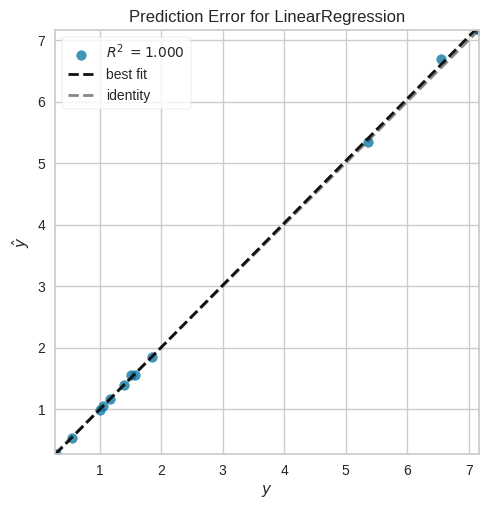

In [35]:
s_exact = RegressionExperiment()
s_exact.setup(
    data=data_exact_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)

best_exact = s_exact.compare_models(turbo=True, sort="R2")
s_exact.plot_model(best_exact, plot="error")

## Trotter (Simulation, Noise free)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.2641,3.1276,1.5767,0.6454,0.3437,1.0833,0.0050
ada,AdaBoost Regressor,1.1274,2.9214,1.4670,0.6291,0.3158,0.6488,0.0120
et,Extra Trees Regressor,1.2142,2.7522,1.5816,0.6010,0.3199,0.5894,0.0180
gbr,Gradient Boosting Regressor,1.1550,3.1696,1.5670,0.5993,0.3117,0.7157,0.0120
rf,Random Forest Regressor,1.3531,3.4106,1.6817,0.5833,0.3800,1.0806,0.0230
lr,Linear Regression,1.2624,2.5346,1.5373,0.5768,0.3535,1.3492,0.0060
br,Bayesian Ridge,1.3017,3.3847,1.7092,0.4535,0.3376,0.9645,0.0060
knn,K Neighbors Regressor,1.6541,4.8876,2.0726,0.4432,0.4583,1.1846,0.0140
dt,Decision Tree Regressor,1.2799,4.2681,1.8238,0.4422,0.3331,0.4687,0.0060
omp,Orthogonal Matching Pursuit,1.6733,5.2610,2.0896,0.4370,0.4025,0.9209,0.0060


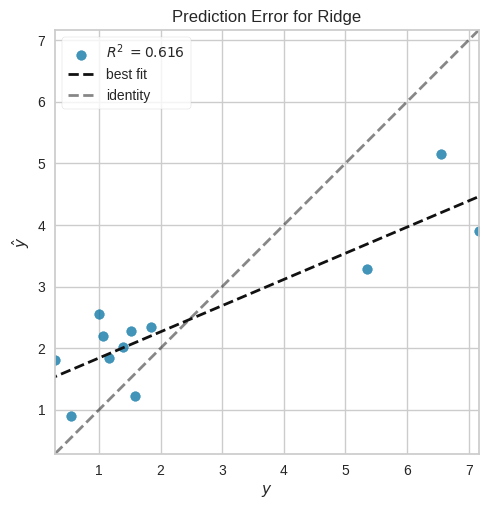

In [36]:
s_sim = RegressionExperiment()
s_sim.setup(
    data=data_sim_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)

best_sim = s_sim.compare_models(turbo=True, sort="R2")
s_sim.plot_model(best_sim, plot="error")

## Trotter (Simulation, Noisy)

In [37]:
def create_model_and_plot(
    experiment: RegressionExperiment,
    exact_experiment: RegressionExperiment,  # 比較用: non-Trotter シミュレータのノイズなしの結果
    sim_experiment: RegressionExperiment,  # 比較用: Trotter シミュレータのノイズなしの結果
    reg_method=None,  # 回帰手法. "ada", "dt", "et", "gbr", "knn", "lar", "lightgbm", "lr", "mlp", "omp", "par", "ransac", "rf", "ridge", "svm", "xgboost"
) -> None:
    # モデルを作成
    if reg_method:  # 指定された回帰手法でモデルを作成
        model = experiment.create_model(reg_method, verbose=False)
        exact_model = exact_experiment.create_model(reg_method, verbose=False)
        sim_model = sim_experiment.create_model(reg_method, verbose=False)
    else:  # 指定されなければ最適なモデルを作成
        model = experiment.compare_models(turbo=True, sort="R2", verbose=False)
        exact_model = exact_experiment.compare_models(
            turbo=True, sort="R2", verbose=False
        )
        sim_model = sim_experiment.compare_models(turbo=True, sort="R2", verbose=False)

    experiment.tune_model(model, optimize="MSE", choose_better=True, verbose=False)
    exact_experiment.tune_model(
        exact_model, optimize="MSE", choose_better=True, verbose=False
    )
    sim_experiment.tune_model(
        sim_model, optimize="MSE", choose_better=True, verbose=False
    )

    # 回帰手法の名前を取得
    reg_method = model.__class__.__name__
    exact_reg_method = exact_model.__class__.__name__
    sim_reg_method = sim_model.__class__.__name__

    pred = experiment.predict_model(model)
    x = pred["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
    y = pred["prediction_label"].values
    r2 = r2_score(x, y)
    mse = mean_squared_error(x, y)

    exact_pred = exact_experiment.predict_model(exact_model)
    exact_x = exact_pred["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
    exact_y = exact_pred["prediction_label"].values
    exact_r2 = r2_score(exact_x, exact_y)
    exact_mse = mean_squared_error(exact_x, exact_y)

    sim_pred = sim_experiment.predict_model(sim_model)
    sim_x = sim_pred["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
    sim_y = sim_pred["prediction_label"].values
    sim_r2 = r2_score(sim_x, sim_y)
    sim_mse = mean_squared_error(sim_x, sim_y)

    # 回帰直線を計算
    linear_model = LinearRegression()
    linear_model.fit(x, y)
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_

    exact_linear_model = LinearRegression()
    exact_linear_model.fit(exact_x, exact_y)
    exact_slope = exact_linear_model.coef_[0]
    exact_intercept = exact_linear_model.intercept_

    sim_linear_model = LinearRegression()
    sim_linear_model.fit(sim_x, sim_y)
    sim_slope = sim_linear_model.coef_[0]
    sim_intercept = sim_linear_model.intercept_

    # プロット
    plt.figure(figsize=(8, 6))
    plt.scatter(
        x,
        y,
        alpha=0.5,
        color="green",
        label=f"{reg_method}, R2 = {r2:.2f}, MSE = {mse:.2f}",
    )
    plt.scatter(
        exact_x,
        exact_y,
        alpha=0.5,
        color="red",
        label=f"non-Trotter Sim: {exact_reg_method}, R2 = {exact_r2:.2f}, MSE = {exact_mse:.2f}",
    )
    plt.scatter(
        sim_x,
        sim_y,
        alpha=0.5,
        color="blue",
        label=f"Trotter Sim: {sim_reg_method}, R2 = {sim_r2:.2f}, MSE = {sim_mse:.2f}",
    )

    # 回帰直線を追加
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    plt.plot(
        x_range,
        linear_model.predict(x_range),
        color="green",
        label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
    )
    exact_x_range = np.linspace(exact_x.min(), exact_x.max(), 100).reshape(-1, 1)
    plt.plot(
        exact_x_range,
        exact_linear_model.predict(exact_x_range),
        color="red",
        label=f"non-Trotter Sim: Best fit line (y = {exact_slope:.2f}x + {exact_intercept:.2f})",
    )
    sim_x_range = np.linspace(sim_x.min(), sim_x.max(), 100).reshape(-1, 1)
    plt.plot(
        sim_x_range,
        sim_linear_model.predict(sim_x_range),
        color="blue",
        label=f"Trotter Sim: Best fit line (y = {sim_slope:.2f}x + {sim_intercept:.2f})",
    )

    # Identity line
    plt.plot(
        [x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity"
    )

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.title(f"{n_qubits}Q - Predicted vs Actual")
    plt.show()

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.0882,2.3722,1.5402,0.5587,0.3825,0.6817


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0230,0.0022,0.0468,0.9996,0.0091,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,1.1833,2.0638,1.4366,0.6161,0.3955,0.9724


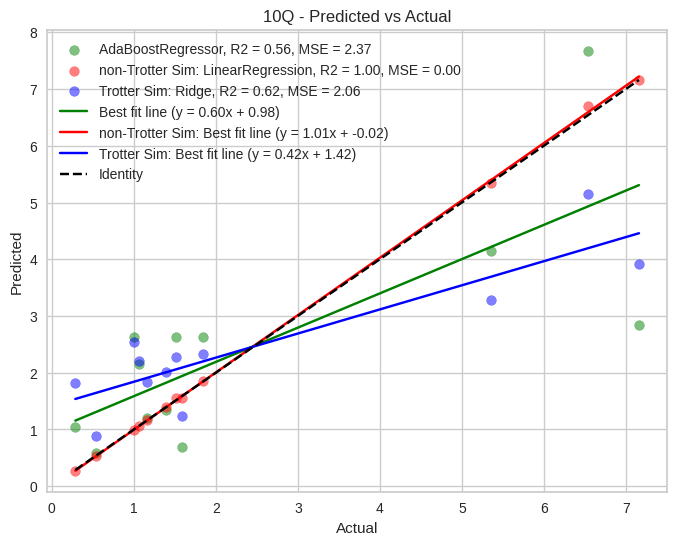

In [38]:
s_sim_noisy = RegressionExperiment()
s_sim_noisy.setup(
    data=data_sim_noisy_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_sim_noisy, s_exact, s_sim)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3130,2.4813,1.5752,0.5384,0.4268,0.8840


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1051,1.6746,1.2941,0.6885,0.3800,0.7468


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3433,2.8264,1.6812,0.4742,0.4658,1.0328


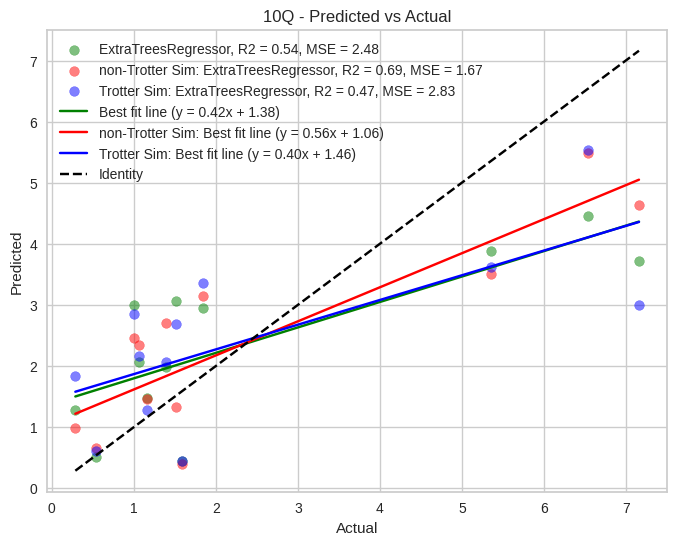

In [39]:
create_model_and_plot(s_sim_noisy, s_exact, s_sim, reg_method="et")

## Trotter (QPU, no mitigation)

In [15]:
s_nmit = RegressionExperiment()
s_nmit.setup(
    data=data_nmit_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_nmit, s_exact, s_sim)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


NameError: name 'create_model_and_plot' is not defined

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1334,2.1168,1.4549,0.6062,0.3716,0.7111


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1051,1.6746,1.2941,0.6885,0.3800,0.7468


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3433,2.8264,1.6812,0.4742,0.4658,1.0328


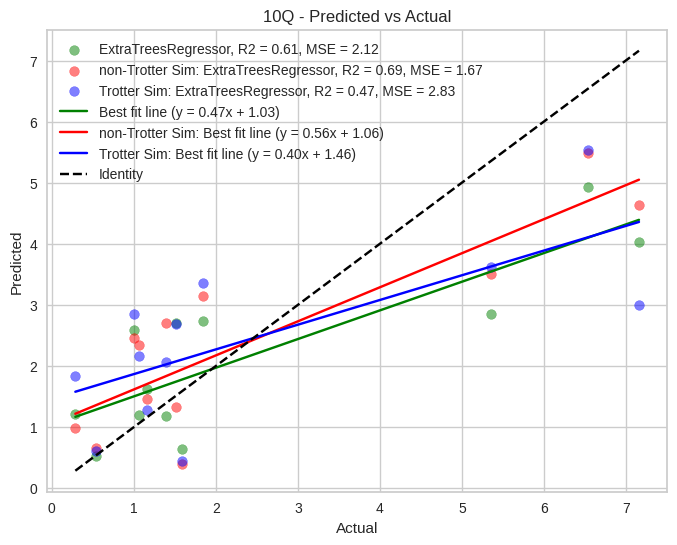

In [41]:
create_model_and_plot(s_nmit, s_exact, s_sim, reg_method="et")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:56:30
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0496,14.7386,3.8391,-5.7922,0.6416,1.8446
1,2.5904,10.0640,3.1724,0.6123,0.3513,0.3538
2,1.4892,2.6689,1.6337,0.9038,0.6361,4.4040
3,1.4885,3.5027,1.8716,0.5992,0.2811,0.3685
4,2.6594,8.7893,2.9647,0.8163,0.5090,0.9787
5,3.1488,24.0090,4.8999,0.2706,0.5562,0.4594
6,2.3961,10.3272,3.2136,0.3886,0.4950,1.4265
7,1.0867,1.6533,1.2858,-0.1770,0.3474,2.6171
8,1.1511,3.1199,1.7663,0.8810,0.3059,0.7254


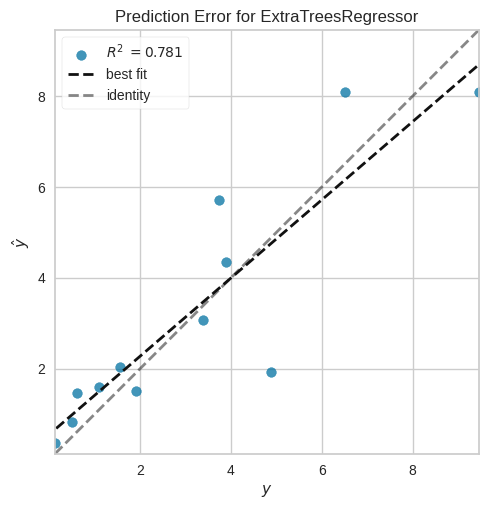

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.8423,9.6478,3.1061,-3.4461,0.6506,3.3105
1,2.7173,10.8339,3.2915,0.5826,0.3472,0.3731
2,2.0258,4.5273,2.1278,0.8368,0.7801,6.1639
3,1.6289,4.1961,2.0484,0.5198,0.3431,0.5001
4,3.2217,13.9917,3.7405,0.7075,0.4853,0.8578
5,3.0881,20.5413,4.5323,0.3760,0.5257,0.5557
6,2.8890,12.1750,3.4893,0.2792,0.6167,2.3603
7,1.5984,3.4672,1.8620,-1.4684,0.5798,7.4310
8,2.2190,6.0883,2.4674,0.7678,0.4734,1.5068


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.9522,1.5694,1.2528,0.7808,0.2936,0.5589


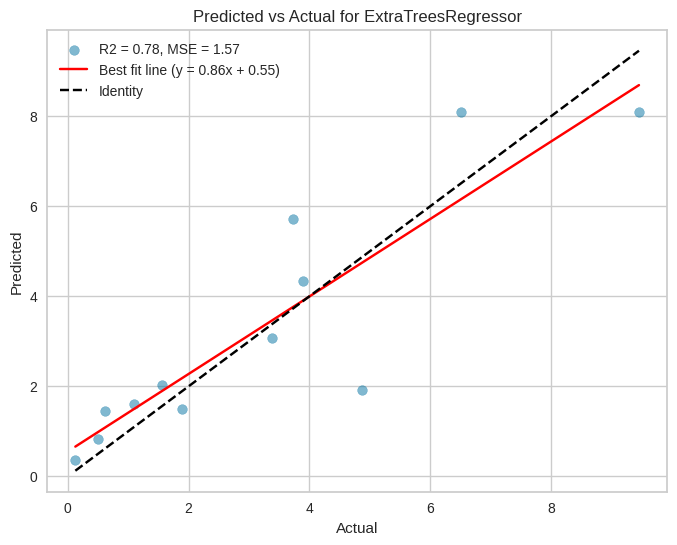

In [19]:
# model_nmit = s_nmit.compare_models(turbo=True, sort="R2")
model_nmit = s_nmit.create_model("et")
s_nmit.plot_model(model_nmit, plot="error")
s_nmit.tune_model(model_nmit, optimize="MSE", choose_better=True)
prod = s_nmit.predict_model(model_nmit)
x = prod["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
y = prod["prediction_label"].values
r2 = r2_score(x, y)
mse = mean_squared_error(x, y)

# 回帰直線を計算
linear_model = LinearRegression()
linear_model.fit(x, y)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label=f"R2 = {r2:.2f}, MSE = {mse:.2f}")

# 回帰直線を追加
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(
    x_range,
    linear_model.predict(x_range),
    color="red",
    label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
)

# Identity line
plt.plot([x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title(f"Predicted vs Actual for {model_nmit.__class__.__name__}")
plt.show()

## Trotter (QPU, mitigation)

In [18]:
s_mit = RegressionExperiment()
s_mit.setup(
    data=data_mit_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_mit, s_exact, s_sim)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


NameError: name 'create_model_and_plot' is not defined

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1349,2.0428,1.4293,0.6200,0.3669,0.7441


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1051,1.6746,1.2941,0.6885,0.3800,0.7468


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3433,2.8264,1.6812,0.4742,0.4658,1.0328


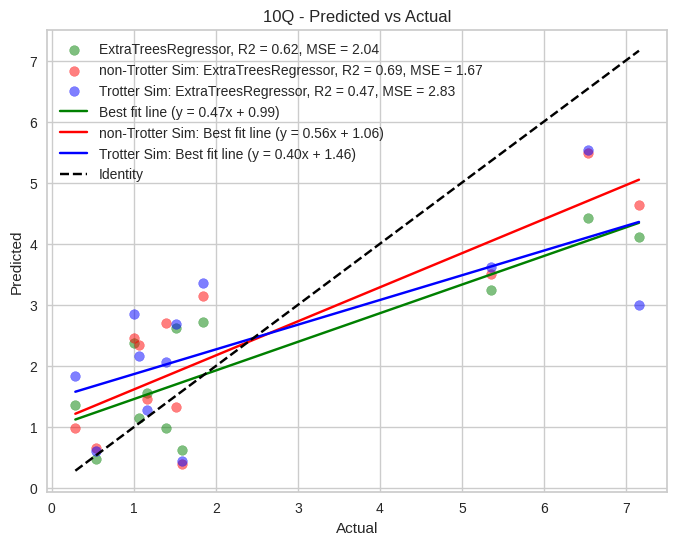

In [43]:
create_model_and_plot(s_mit, s_exact, s_sim, reg_method="et")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.1770,9.4250,2.8872,0.0471,0.4537,1.5015,0.0230
br,Bayesian Ridge,2.4702,10.2156,2.9832,0.0039,0.5326,2.8345,0.0060
ridge,Ridge Regression,2.5707,10.5449,3.0365,-0.0411,0.5630,3.1164,0.0060
ada,AdaBoost Regressor,2.2542,11.5560,3.1834,-0.0598,0.5015,1.8252,0.0110
gbr,Gradient Boosting Regressor,2.1006,10.1809,2.9217,-0.1130,0.4498,1.0367,0.0110
et,Extra Trees Regressor,2.0827,8.3491,2.6843,-0.1631,0.4376,1.2902,0.0190
lr,Linear Regression,2.7644,12.9212,3.4365,-0.3030,0.6354,2.6421,0.0050
huber,Huber Regressor,2.8356,13.7276,3.5555,-0.3963,0.6450,2.8382,0.0070
par,Passive Aggressive Regressor,2.5194,11.5375,3.1424,-0.4113,0.5595,3.3988,0.0050
dt,Decision Tree Regressor,2.1235,12.7513,3.1643,-0.7630,0.4347,0.7480,0.0050


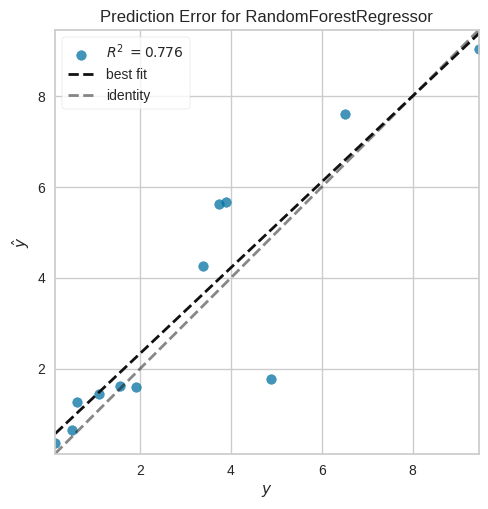

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2669,6.4152,2.5328,-1.9564,0.5046,2.0159
1,2.6018,10.5276,3.2446,0.5944,0.3630,0.3589
2,1.5554,3.4303,1.8521,0.8764,0.5888,4.0422
3,1.4470,5.4079,2.3255,0.3812,0.3312,0.3568
4,2.9022,13.7985,3.7146,0.7116,0.4250,0.5959
5,3.0979,21.3146,4.6168,0.3525,0.5255,0.5158
6,3.2420,15.6819,3.9600,0.0716,0.6439,1.8384
7,0.9909,1.6120,1.2697,-0.1476,0.3768,3.5822
8,2.1069,7.0741,2.6597,0.7302,0.4395,1.2438


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.9095,1.6025,1.2659,0.7762,0.2917,0.4913


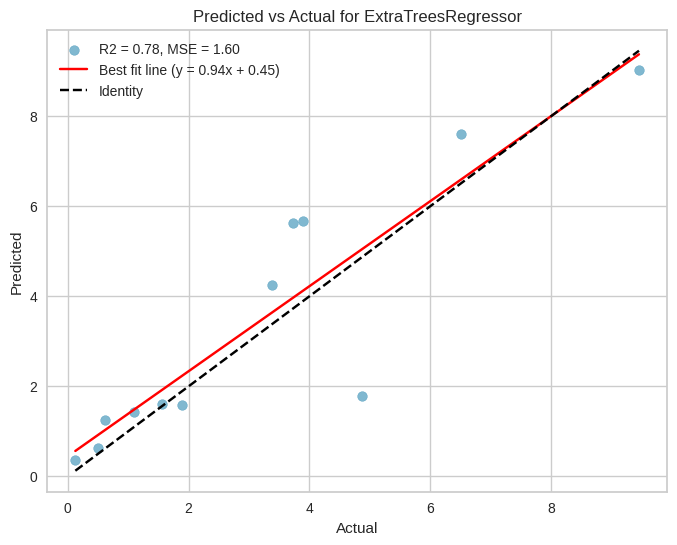

In [20]:
model_mit = s_mit.compare_models(turbo=True, sort="R2")
s_mit.plot_model(model_mit, plot="error")
s_mit.tune_model(model_mit, optimize="MSE", choose_better=True)
prod = s_mit.predict_model(model_mit)
x = prod["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
y = prod["prediction_label"].values
r2 = r2_score(x, y)
mse = mean_squared_error(x, y)

# 回帰直線を計算
linear_model = LinearRegression()
linear_model.fit(x, y)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label=f"R2 = {r2:.2f}, MSE = {mse:.2f}")

# 回帰直線を追加
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(
    x_range,
    linear_model.predict(x_range),
    color="red",
    label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
)

# Identity line
plt.plot([x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title(f"Predicted vs Actual for {model_nmit.__class__.__name__}")
plt.show()